# Introduction:

I opted for a database related to cardiovascular disease. The database has 12 columns - 11 inputs and 1 column with diagnosis. The number of rows is over 69 thousand.

Due to the fact that the work on both versions of the data is analogous - I will discuss the operation on the first of them.

The database has data such as age, gender, weight, height, blood pressure, categorical assessment of cholesterol and glucose levels, information whether the patient is a smoker, consumes alcohol and is physically active, and whether he suffers from cardiovascular disease.

The aim of the project will be to predict whether the patient is sick or healthy based on the results.

I IMPORT NEEDED LIBRARIES AND DATABASE:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, minmax_scale
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, mean_squared_error, ConfusionMatrixDisplay
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.neural_network import MLPRegressor, MLPClassifier
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

df = pd.read_csv("cardio_train.csv")
df

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,988;22469;1;155;69.0;130;80;2;2;0;0;1;0
1,989;14648;1;163;71.0;110;70;1;1;0;0;1;1
2,990;21901;1;165;70.0;120;80;1;1;0;0;1;0
3,991;14549;2;165;85.0;120;80;1;1;1;1;1;0
4,992;23393;1;155;62.0;120;80;1;1;0;0;1;0
...,...
69296,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69297,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69298,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69299,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


# Processing:

The data was imported incorrectly into the program. Therefore, I will try to prepare them for work.

In [2]:
df = df.join(df['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'].str.split(';', expand = True).rename(columns = {0:'id', 1:'age', 2:'gender', 3:'height', 4:'weight', 5:'systolic_blood_pressure', 6:'diastolic_blood_pressure', 7:'cholesterol', 8:'glucose', 9:'smoking', 10:'alcohol_intake', 11:'physical_activity', 12:'diagnose'}))
df #At the beginning, I separate the data separated by ";" into separate columns.

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,physical_activity,diagnose
0,988;22469;1;155;69.0;130;80;2;2;0;0;1;0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989;14648;1;163;71.0;110;70;1;1;0;0;1;1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990;21901;1;165;70.0;120;80;1;1;0;0;1;0,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991;14549;2;165;85.0;120;80;1;1;1;1;1;0,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992;23393;1;155;62.0;120;80;1;1;0;0;1;0,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df = df.drop(columns = ['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio', 'id'])
df #Then I need to remove the "glued" column.

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,physical_activity,diagnose
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In the next step, I need to change the data types to be able to perform specific actions.

In [4]:
df['age'] = df['age'].astype(float)
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)
df['systolic_blood_pressure'] = df['systolic_blood_pressure'].astype(int)
df['diastolic_blood_pressure'] = df['diastolic_blood_pressure'].astype(int)

In [5]:
df['age'] = df['age']/365 #Age is in days, so I'll round days to years for clarity.

I copy the current version of the DataFrame for further work. These will be the databases from which I will make two versions of the data.

In [6]:
df1 = df.copy()
df2 = df.copy()
df1 

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,physical_activity,diagnose
0,61.558904,1,155.0,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,163.0,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165.0,70.0,120,80,1,1,0,0,1,0
3,39.860274,2,165.0,85.0,120,80,1,1,1,1,1,0
4,64.090411,1,155.0,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52.712329,2,168.0,76.0,120,80,1,1,1,0,1,0
69297,61.920548,1,158.0,126.0,140,90,2,2,0,0,1,1
69298,52.235616,2,183.0,105.0,180,90,3,1,0,1,0,1
69299,61.454795,1,163.0,72.0,135,80,1,2,0,0,0,1



On the basic version, I will present for clarity what the specific numbers mean and what the base supplemented with words would look like.

In [7]:
df['gender'] = df['gender'].str.replace('1', 'female') #In the 'gender' column, I replace 0 with female and 1 with male.
df['gender'] = df['gender'].str.replace('2', 'male')

df['cholesterol'] = df['cholesterol'].str.replace('1', 'normal') #The rest analogously:
df['cholesterol'] = df['cholesterol'].str.replace('2', 'above_normal')
df['cholesterol'] = df['cholesterol'].str.replace('3', 'well_above_normal')

df['glucose'] = df['glucose'].str.replace('1', 'normal')
df['glucose'] = df['glucose'].str.replace('2', 'above_normal')
df['glucose'] = df['glucose'].str.replace('3', 'well_above_normal')

df['smoking'] = df['smoking'].str.replace('0', 'no')
df['smoking'] = df['smoking'].str.replace('1', 'yes')

df['alcohol_intake'] = df['alcohol_intake'].str.replace('0', 'no')
df['alcohol_intake'] = df['alcohol_intake'].str.replace('1', 'yes')

df['physical_activity'] = df['physical_activity'].str.replace('0', 'no')
df['physical_activity'] = df['physical_activity'].str.replace('1', 'yes')

df['diagnose'] = df['diagnose'].str.replace('0', 'healthy')
df['diagnose'] = df['diagnose'].str.replace('1', 'sick')

df1['diagnose'] = df1['diagnose'].str.replace('0', 'healthy')
df1['diagnose'] = df1['diagnose'].str.replace('1', 'sick')

#This is what a 'cleaned up' database looks like.
df

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,physical_activity,diagnose
0,61.558904,female,155.0,69.0,130,80,above_normal,above_normal,no,no,yes,healthy
1,40.131507,female,163.0,71.0,110,70,normal,normal,no,no,yes,sick
2,60.002740,female,165.0,70.0,120,80,normal,normal,no,no,yes,healthy
3,39.860274,male,165.0,85.0,120,80,normal,normal,yes,yes,yes,healthy
4,64.090411,female,155.0,62.0,120,80,normal,normal,no,no,yes,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52.712329,male,168.0,76.0,120,80,normal,normal,yes,no,yes,healthy
69297,61.920548,female,158.0,126.0,140,90,above_normal,above_normal,no,no,yes,sick
69298,52.235616,male,183.0,105.0,180,90,well_above_normal,normal,no,yes,no,sick
69299,61.454795,female,163.0,72.0,135,80,normal,above_normal,no,no,no,sick


In [8]:
#I check how many times different values appear in individual columns. I use a built-in function for this - value_counts.
print('Gender: ')
print(df['gender'].value_counts())
print(' ')
print('Diagnose: ')
print(df['diagnose'].value_counts())
print(' ')
print('Smoking: ')
print(df['smoking'].value_counts())
print(' ')
print('Alcohol intake:')
print(df['alcohol_intake'].value_counts())
print(' ')
print('Physical activity: ')
print(df['physical_activity'].value_counts())

Gender: 
female    45079
male      24222
Name: gender, dtype: int64
 
Diagnose: 
healthy    34679
sick       34622
Name: diagnose, dtype: int64
 
Smoking: 
no     63199
yes     6102
Name: smoking, dtype: int64
 
Alcohol intake:
no     65567
yes     3734
Name: alcohol_intake, dtype: int64
 
Physical activity: 
yes    55717
no     13584
Name: physical_activity, dtype: int64


Conclusion: About 2 times more women than men took part in the study. There are about the same number of sick and healthy. The vast majority have healthy habits - not drinking alcohol, not smoking and being physically active.


Now back to the first version of the data. I will not process it except for the work preparation I did at the beginning. However, I will check check that the data doesn't contain blank spaces.


For work, I will use categorical data written with numbers, as it will not work with written in words. Because of this - earlier I presented what the individual numbers mean.

In [9]:
#I check if there are any missing data. I find their location right away. I'm using the numpy library for this.
empty_age = np.where(df1['age'].isna())[0]
empty_gender = np.where(df1['gender'].isna())[0]
empty_height = np.where(df1['height'].isna())[0]
empty_weight = np.where(df1['weight'].isna())[0]
empty_systolic_blood_pressure = np.where(df1['systolic_blood_pressure'].isna())[0]
empty_diastolic_blood_pressure = np.where(df1['diastolic_blood_pressure'].isna())[0]
empty_cholesterol = np.where(df1['cholesterol'].isna())[0]
empty_glucose = np.where(df1['glucose'].isna())[0]
empty_smoking = np.where(df1['smoking'].isna())[0]
empty_alcohol_intake = np.where(df1['alcohol_intake'].isna())[0]
empty_physical_activity = np.where(df1['physical_activity'].isna())[0]
empty_diagnose = np.where(df1['diagnose'].isna())[0]

#I print length of lists with indexes of empty data. If they are equal to 0 - it means that there are no missing values.
print('Number of empty data in column age: ', len(empty_age))
print('Number of empty data in column gender: ', len(empty_gender))
print('Number of empty data in column height: ', len(empty_height))
print('Number of empty data in column weight: ', len(empty_weight))
print('Number of empty data in column systolic_blood_pressure: ', len(empty_systolic_blood_pressure))
print('Number of empty data in column diastolic_blood_pressure: ', len(empty_diastolic_blood_pressure))
print('Number of empty data in column cholesterol: ', len(empty_cholesterol))
print('Number of empty data in column glucose: ', len(empty_glucose))
print('Number of empty data in column smoking: ', len(empty_smoking))
print('Number of empty data in column alcohol_intake: ', len(empty_alcohol_intake))
print('Number of empty data in column physical_activity: ', len(empty_physical_activity))
print('Number of empty data in column diagnose: ', len(empty_diagnose))

Number of empty data in column age:  0
Number of empty data in column gender:  0
Number of empty data in column height:  0
Number of empty data in column weight:  0
Number of empty data in column systolic_blood_pressure:  0
Number of empty data in column diastolic_blood_pressure:  0
Number of empty data in column cholesterol:  0
Number of empty data in column glucose:  0
Number of empty data in column smoking:  0
Number of empty data in column alcohol_intake:  0
Number of empty data in column physical_activity:  0
Number of empty data in column diagnose:  0


Then I will normalize the non-categorical data and thus prepare the second version of the database.

In [10]:
#I'm making a list of columns that I want to denormalize, I'm skipping the categorical ones.
col = ['age', 'weight', 'height', 'systolic_blood_pressure', 'diastolic_blood_pressure']
df2[col] = minmax_scale(df2[col]) #For scaling I use the function to which I imported the library earlier.

#This is how the data looks after normalization.
df2

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,physical_activity,diagnose
0,0.903678,1,0.512821,0.310526,0.017316,0.013550,2,2,0,0,1,0
1,0.298103,1,0.553846,0.321053,0.016079,0.012647,1,1,0,0,1,1
2,0.859698,1,0.564103,0.315789,0.016698,0.013550,1,1,0,0,1,0
3,0.290437,2,0.564103,0.394737,0.016698,0.013550,1,1,1,1,1,0
4,0.975223,1,0.512821,0.273684,0.016698,0.013550,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,0.653659,2,0.579487,0.347368,0.016698,0.013550,1,1,1,0,1,0
69297,0.913899,1,0.528205,0.610526,0.017934,0.014453,2,2,0,0,1,1
69298,0.640186,2,0.656410,0.500000,0.020408,0.014453,3,1,0,1,0,1
69299,0.900736,1,0.553846,0.326316,0.017625,0.013550,1,2,0,0,0,1


In [11]:
#I check that the results that are supposed to differ are not too similar or the same.
print('Systolic_blood_pressure: ')
print(df['systolic_blood_pressure'].value_counts())
print(' ')
print('Diastolic_blood_pressure: ')
print(df['diastolic_blood_pressure'].value_counts())

Systolic_blood_pressure: 
 120     27431
 140      9406
 130      8877
 110      8550
 150      4398
         ...  
 181         1
-150         1
 1130        1
 902         1
 2000        1
Name: systolic_blood_pressure, Length: 153, dtype: int64
 
Diastolic_blood_pressure: 
80     34513
90     14163
70     10137
100     4043
60      2705
       ...  
56         1
182        1
810        1
9          1
602        1
Name: diastolic_blood_pressure, Length: 157, dtype: int64


Now, after preparing two versions of the data: df1 - only cleaned up and df2 - additionally normalized, I start testing the classifiers.

# For unnormalized data:

In [12]:
#First, I divide the data into training and test sets in a 7:3 ratio.
(train_set, test_set) = train_test_split(df1.values, train_size = 0.7, random_state = 13)

#I present how many rows each set contains.
print('Train size:', train_set.shape[0])
print('Test size:', test_set.shape[0])

Train size: 48510
Test size: 20791


In [13]:
#For each set, I assign which columns are inputs, on the basis of which the answer will be predicted, and the column with the assigned result.
train_inputs = train_set[:, 0:11] #
train_classes = train_set[:, 11]
test_inputs = test_set[:, 0:11]
test_classes = test_set[:, 11]

In [14]:
results1 = [] #I create an empty list to which I will add accuracy results.

DECISION TREE - SMALLER

In [15]:
dtc1 = DecisionTreeClassifier(max_depth = 4) #The first is a tree with trimmed branches. I set the maximum number of branches to 4.

dtc1.fit(train_inputs, train_classes)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'x[4] <= 129.5\ngini = 0.5\nsamples = 48510\nvalue = [24296, 24214]'),
 Text(0.25, 0.7, 'x[0] <= 55.207\ngini = 0.434\nsamples = 28661\nvalue = [19545, 9116]'),
 Text(0.125, 0.5, 'x[6] <= 2.5\ngini = 0.363\nsamples = 17743\nvalue = [13518, 4225]'),
 Text(0.0625, 0.3, 'x[0] <= 44.048\ngini = 0.346\nsamples = 16967\nvalue = [13195, 3772]'),
 Text(0.03125, 0.1, 'gini = 0.236\nsamples = 4564\nvalue = [3941, 623]'),
 Text(0.09375, 0.1, 'gini = 0.379\nsamples = 12403\nvalue = [9254, 3149]'),
 Text(0.1875, 0.3, 'x[7] <= 2.5\ngini = 0.486\nsamples = 776\nvalue = [323, 453]'),
 Text(0.15625, 0.1, 'gini = 0.377\nsamples = 330\nvalue = [83, 247]'),
 Text(0.21875, 0.1, 'gini = 0.497\nsamples = 446\nvalue = [240, 206]'),
 Text(0.375, 0.5, 'x[6] <= 2.5\ngini = 0.495\nsamples = 10918\nvalue = [6027, 4891]'),
 Text(0.3125, 0.3, 'x[0] <= 60.836\ngini = 0.487\nsamples = 9775\nvalue = [5682, 4093]'),
 Text(0.28125, 0.1, 'gini = 0.469\nsamples = 7161\nvalue = [4466, 2695]'),
 Text(0.34375,

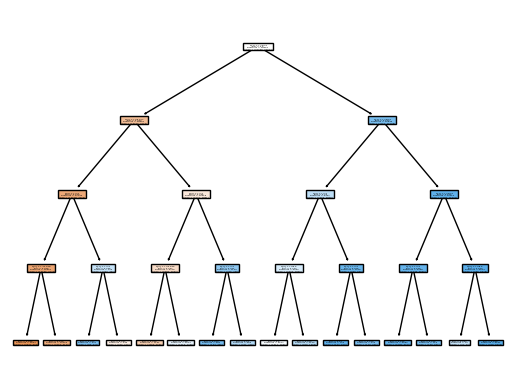

In [16]:
tree.plot_tree(dtc1, filled = True) #Using functions I build a tree and present what it looks like.

Confusion matrix for a smaller tree: 


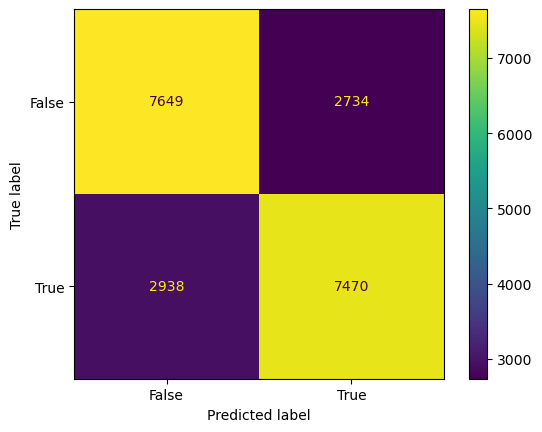

 
Accuracy for a smaller tree: 0.7271896493675148


In [17]:
#Next, I need to present what the error matrix looks like. As before, I use ready-made functions.
print('Confusion matrix for a smaller tree: ')
tree_pred1 = dtc1.predict(test_inputs) #Predicts
cm = confusion_matrix(test_classes, tree_pred1) #I'm creating a confusion matrix.

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]) #display_labels - writes true and false on the both of axis

cm_display.plot() #I add defined labels on the plot.
plt.show() #I printing the plot.

print(' ')
print('Accuracy for a smaller tree:', dtc1.score(test_inputs, test_classes)) #I present accuracy with functions.
results1.append(dtc1.score(test_inputs, test_classes)) #I add the accuracy result to the list for the first version of the data.

How to interpret the results: 
    
7649 and 7470 were predicted correctly. 
You should look where true with true and false with false coincide.

7649 + 7470 = 15119

15119 / 20791 (test_size) = accuracy

DECISION TREE - BIGGER

Similarly to the smaller one, I do not define only the maximum number of branches. Therefore, these calculations take much longer.

In [20]:
dtc2 = DecisionTreeClassifier()

dtc2.fit(train_inputs, train_classes)

DecisionTreeClassifier()

[Text(0.598056668355256, 0.9903846153846154, 'x[4] <= 129.5\ngini = 0.5\nsamples = 48510\nvalue = [24296, 24214]'),
 Text(0.38831976971557053, 0.9711538461538461, 'x[0] <= 55.207\ngini = 0.434\nsamples = 28661\nvalue = [19545, 9116]'),
 Text(0.23297645501209155, 0.9519230769230769, 'x[6] <= 2.5\ngini = 0.363\nsamples = 17743\nvalue = [13518, 4225]'),
 Text(0.12294487786923392, 0.9326923076923077, 'x[0] <= 44.048\ngini = 0.346\nsamples = 16967\nvalue = [13195, 3772]'),
 Text(0.044462396619596896, 0.9134615384615384, 'x[6] <= 1.5\ngini = 0.236\nsamples = 4564\nvalue = [3941, 623]'),
 Text(0.024528043317455915, 0.8942307692307693, 'x[4] <= 114.5\ngini = 0.213\nsamples = 4107\nvalue = [3610, 497]'),
 Text(0.009297079240940538, 0.875, 'x[3] <= 68.5\ngini = 0.153\nsamples = 1746\nvalue = [1600, 146]'),
 Text(0.005069348745115379, 0.8557692307692307, 'x[5] <= 140.0\ngini = 0.122\nsamples = 1040\nvalue = [972, 68]'),
 Text(0.004965451598927237, 0.8365384615384616, 'x[7] <= 1.5\ngini = 0.121\ns

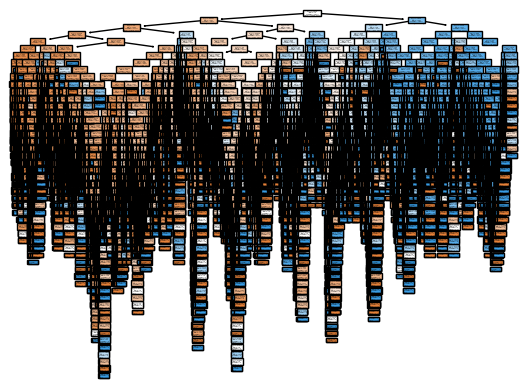

In [21]:
tree.plot_tree(dtc2, filled = True)

Confusion matrix for a bigger tree: 


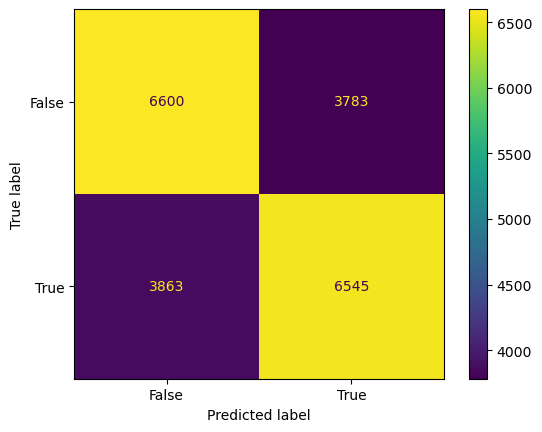

 
Accuracy for a bigger tree: 0.632244721273628


In [22]:
print('Confusion matrix for a bigger tree: ')
tree_pred2 = dtc2.predict(test_inputs)
cm = confusion_matrix(test_classes, tree_pred2)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for a bigger tree:', dtc2.score(test_inputs, test_classes))
results1.append(dtc2.score(test_inputs, test_classes))

Conclusion: calculations for a smaller tree are much faster and more efficient. The result I got for a large tree is worse.

NAIVE BAYES

Confusion matrix for Naive Bayes: 


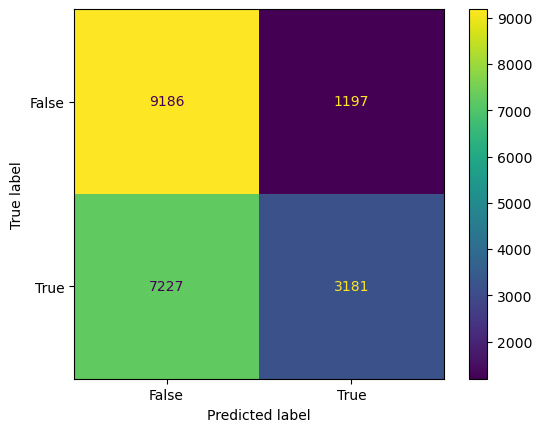

 
Accuracy for Naive Bayes:  0.5948246837573951


In [23]:
#Second method - It works simillary. I also had to use library.
print('Confusion matrix for Naive Bayes: ')

NB1 = GaussianNB() 
NB1.fit(train_inputs, train_classes)
pred_NB1 = NB1.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_NB1)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for Naive Bayes: ', metrics.accuracy_score(test_classes, pred_NB1))
results1.append(metrics.accuracy_score(test_classes, pred_NB1))

Conclusion: Naive - Bayes method performs worse than the decision tree method.

KNN3

k nearest neighbors - I decide to try with k = 3, 5, 9, 11, 20.

Below you will see why.

Confusion matrix for 3 nearest neighbors: 


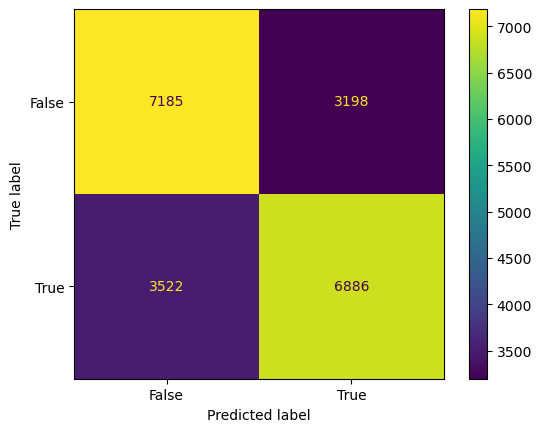

 
Accuracy for 3 nearest neighbors:  0.6767832235101726


In [24]:
print('Confusion matrix for 3 nearest neighbors: ')

knn3_1 = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn3_1.fit(train_inputs, train_classes)
pred_knn3_1 = knn3_1.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn3_1)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 3 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn3_1))
results1.append(metrics.accuracy_score(test_classes, pred_knn3_1))

KNN5

Confusion matrix for 5 nearest neighbors: 


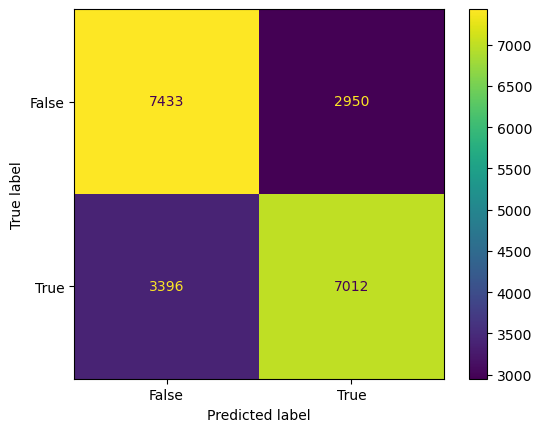

 
Accuracy for 5 nearest neighbors:  0.6947717762493386


In [25]:
print('Confusion matrix for 5 nearest neighbors: ')

knn5_1 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn5_1.fit(train_inputs, train_classes)
pred_knn5_1 = knn5_1.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn5_1)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 5 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn5_1))
results1.append(metrics.accuracy_score(test_classes, pred_knn5_1))

KNN9

Confusion matrix for 9 nearest neighbors: 


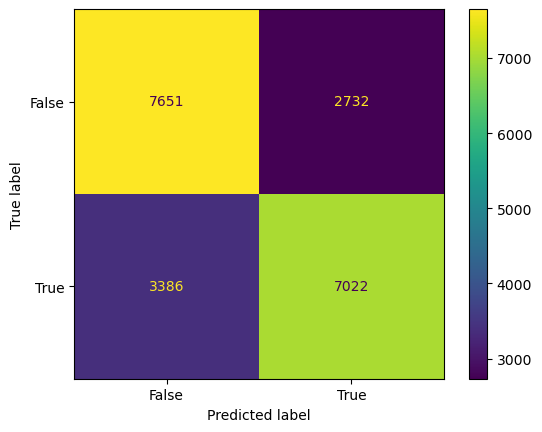

 
Accuracy for 9 nearest neighbors:  0.7057380597373863


In [26]:
print('Confusion matrix for 9 nearest neighbors: ')

knn9_1 = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
knn9_1.fit(train_inputs, train_classes)
pred_knn9_1 = knn9_1.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn9_1)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 9 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn9_1))
results1.append(metrics.accuracy_score(test_classes, pred_knn9_1))

KNN11

Confusion matrix for 11 nearest neighbors: 


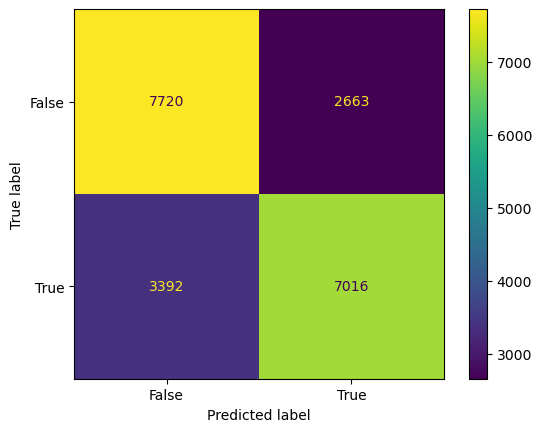

 
Accuracy for 11 nearest neighbors:  0.7087682170169785


In [27]:
print('Confusion matrix for 11 nearest neighbors: ')

knn11_1 = KNeighborsClassifier(n_neighbors = 11, metric = 'euclidean')
knn11_1.fit(train_inputs, train_classes)
pred_knn11_1 = knn11_1.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn11_1)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 11 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn11_1))
results1.append(metrics.accuracy_score(test_classes, pred_knn11_1))

Conclusion: I noticed that initially, the more neighbors, the better the result. But at some point it stops.

KNN20

Confusion matrix for 20 nearest neighbors: 


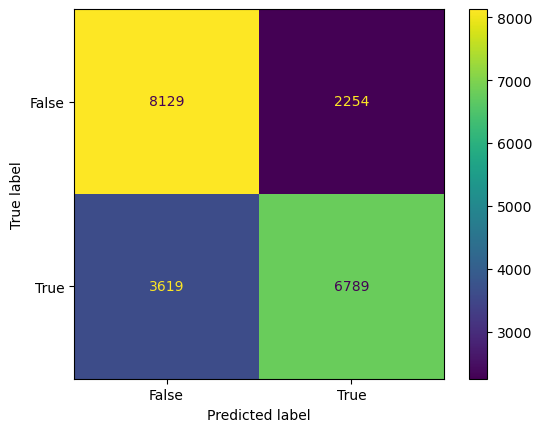

 
Accuracy for 20 nearest neighbors:  0.717522004713578


In [28]:
print('Confusion matrix for 20 nearest neighbors: ')

knn20_1 = KNeighborsClassifier(n_neighbors = 20, metric = 'euclidean')
knn20_1.fit(train_inputs, train_classes)
pred_knn20_1 = knn20_1.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn20_1)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 20 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn20_1))
results1.append(metrics.accuracy_score(test_classes, pred_knn20_1))

NEURAL NETWORKS

In [29]:
#First, I need to split the columns into data based on which the result will be predicted and a diagnosis column.
train_inputs = train_set[:, 0:11]
train_classes = train_set[:, 11]
test_inputs = test_set[:, 0:11]
test_classes = test_set[:, 11]

I will try some combinations. I will change the number of layers and neurons.

1 layer and 2 neurons

Confusion matrix for neural networks with 1 layer and 2 neurons: 


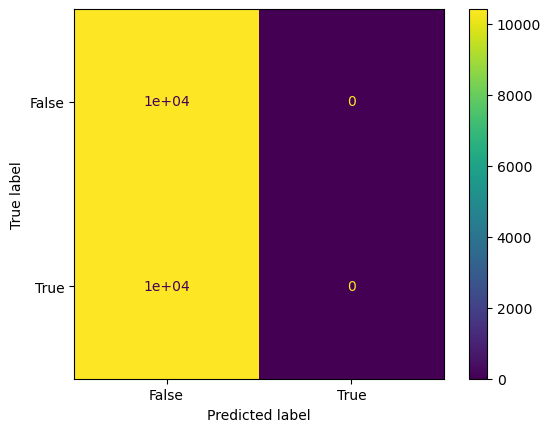

 
Accuracy for neural networks with 1 layer and 2 neurons:  0.49939877831754126


In [30]:
print('Confusion matrix for neural networks with 1 layer and 2 neurons: ')
mlp1 = MLPClassifier(hidden_layer_sizes = (2, ), max_iter = 3000) #3000 - number of iterations, (2, ) - it means 2 neurons on first layer
mlp1.fit(train_inputs, train_classes)

predictions_test1 = mlp1.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test1)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 1 layer and 2 neurons: ', metrics.accuracy_score(test_classes, predictions_test1))
results1.append(metrics.accuracy_score(test_classes, predictions_test1))

Conclusion: Already on such a simple example, we can see so worse results than before.

2 layers and 3 neurons in each

Confusion matrix for neural networks with 2 layers and 3 neurons in each:


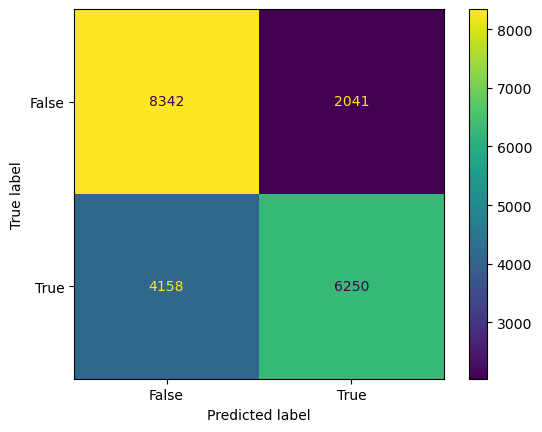

 
Accuracy for neural networks with 2 layers and 3 neurons in each:  0.7018421432350537


In [31]:
print('Confusion matrix for neural networks with 2 layers and 3 neurons in each:' )
mlp2 = MLPClassifier(hidden_layer_sizes = (3, 3, ), max_iter = 3000)
mlp2.fit(train_inputs, train_classes)

predictions_test2 = mlp2.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test2)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 2 layers and 3 neurons in each: ', metrics.accuracy_score(test_classes, predictions_test2))
results1.append(metrics.accuracy_score(test_classes, predictions_test2))

Conclusion: Much better.

8 layers and 4 neurons in each

Confusion matrix for neural networks with 8 layers and 4 neurons in each:


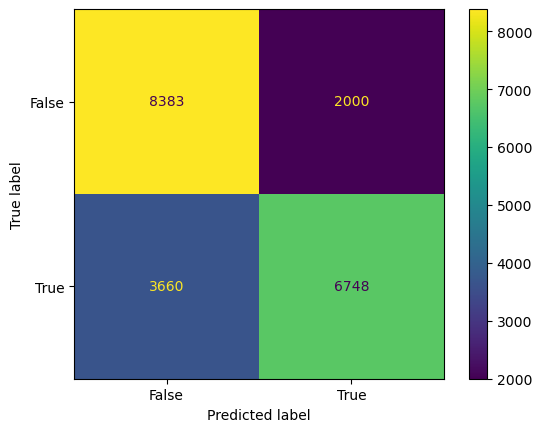

 
Accuracy for neural networks with 8 layers and 4 neurons in each:  0.7277668221826752


In [32]:
print('Confusion matrix for neural networks with 8 layers and 4 neurons in each:' )
mlp3 = MLPClassifier(hidden_layer_sizes = (4, 4, 4, 4, 4, 4, 4, 4, ), max_iter = 5000)
mlp3.fit(train_inputs, train_classes)

predictions_test3 = mlp3.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test3)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 8 layers and 4 neurons in each: ', metrics.accuracy_score(test_classes, predictions_test3))
results1.append(metrics.accuracy_score(test_classes, predictions_test3))

11 layers and 4 neurons in each

Confusion matrix for neural networks with 11 layers and 4 neurons in each:


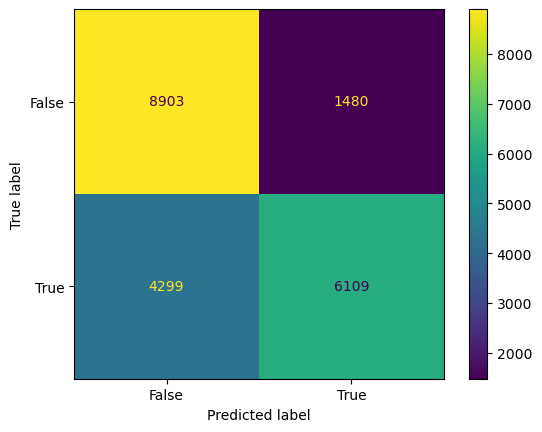

 
Accuracy for neural networks with 11 layers and 4 neurons in each:  0.7220431917656679


In [33]:
print('Confusion matrix for neural networks with 11 layers and 4 neurons in each:' )
mlp4 = MLPClassifier(hidden_layer_sizes = (4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4), max_iter = 5000)
mlp4.fit(train_inputs, train_classes)

predictions_test4 = mlp4.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test4)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 11 layers and 4 neurons in each: ', metrics.accuracy_score(test_classes, predictions_test4))
results1.append(metrics.accuracy_score(test_classes, predictions_test4))

11 layers and 10 neurons in each

Confusion matrix for neural networks with 11 layers and 10 neurons in each:


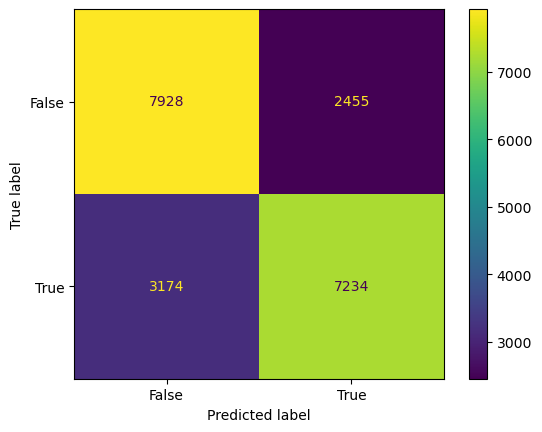

 
Accuracy for neural networks with 11 layers and 10 neurons in each:  0.7292578519551729


In [34]:
print('Confusion matrix for neural networks with 11 layers and 10 neurons in each:' )
mlp5 = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter = 5000)
mlp5.fit(train_inputs, train_classes)

predictions_test5 = mlp5.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test5)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 11 layers and 10 neurons in each: ', metrics.accuracy_score(test_classes, predictions_test5))
results1.append(metrics.accuracy_score(test_classes, predictions_test5))

11 layers and 10 neurons in each and with relu

Confusion matrix for neural networks with 11 layers and 4 neurons in each and with relu:


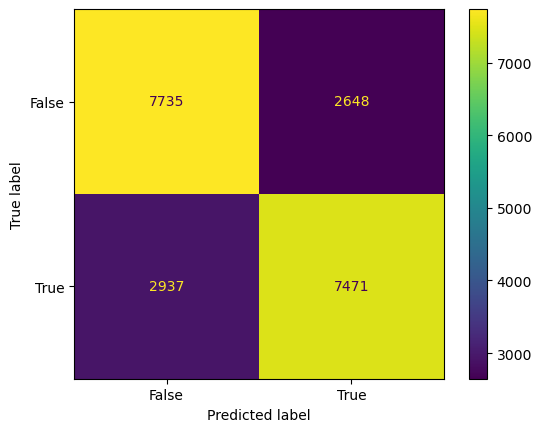

 
Accuracy for neural networks with 11 layers and 10 neurons in each and with relu:  0.7313741522774277


In [35]:
print('Confusion matrix for neural networks with 11 layers and 4 neurons in each and with relu:' )
mlp6 = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), activation = 'relu', max_iter = 5000)
mlp6.fit(train_inputs, train_classes)

predictions_test6 = mlp6.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test6)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 11 layers and 10 neurons in each and with relu: ', metrics.accuracy_score(test_classes, predictions_test6))
results1.append(metrics.accuracy_score(test_classes, predictions_test6))

Conclusion: The ones that have as many layers as the input columns perform best. The 'relu' method do not significantly affect the results.

model

In [ ]:
pip install keras # I had to install keras and tensorflow

In [ ]:
pip install tensorflow

In [36]:
#In order to build the model, I had to change the categorical data about the diagnosis from words to numbers again.
df1['diagnose'] = df1['diagnose'].str.replace('healthy', '0')
df1['diagnose'] = df1['diagnose'].str.replace('sick', '1')
df1

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,physical_activity,diagnose
0,61.558904,1,155.0,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,163.0,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165.0,70.0,120,80,1,1,0,0,1,0
3,39.860274,2,165.0,85.0,120,80,1,1,1,1,1,0
4,64.090411,1,155.0,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52.712329,2,168.0,76.0,120,80,1,1,1,0,1,0
69297,61.920548,1,158.0,126.0,140,90,2,2,0,0,1,1
69298,52.235616,2,183.0,105.0,180,90,3,1,0,1,0,1
69299,61.454795,1,163.0,72.0,135,80,1,2,0,0,0,1


In [37]:
df1.dtypes #I check the type of variables. I had an error. Therefore, I had to change the types of variables to float32.

age                         float64
gender                       object
height                      float64
weight                      float64
systolic_blood_pressure       int32
diastolic_blood_pressure      int32
cholesterol                  object
glucose                      object
smoking                      object
alcohol_intake               object
physical_activity            object
diagnose                     object
dtype: object

In [38]:
df1 = df1.astype(np.float32) # Here i change the types of data.

In [39]:
#Due to the fact that the data has changed a bit, I re-create it into a training set, a training set, sets of classes and inputs.

(train_set, test_set) = train_test_split(df1.values, train_size = 0.7, 
random_state = 13)

train_inputs = train_set[:, 0:11]
train_classes = train_set[:, 11]
test_inputs = test_set[:, 0:11]
test_classes = test_set[:, 11]

train_classes = np_utils.to_categorical(train_classes)

In [40]:
#Now, by analogy with the classes, I try to build a model.

model = Sequential() #This is from libraries.
model.add(Dense(12, input_dim = 11, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [41]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
history = model.fit(train_inputs, train_classes, validation_split = 0.33, epochs = 150, batch_size = 10, verbose = 0)
#I add validation_split and verbose, I do not know why, but without this i had an error.
#These cell works for a very long time.

In [43]:
#After training the model, I wire the values and check the accuracy.
class_pred = model.predict(test_inputs)
class_pred = np.argmax(class_pred, axis = 1)
print('Accuracy for a model: ', accuracy_score(test_classes, class_pred))
results1.append(accuracy_score(test_classes, class_pred))

650/650 [==============================] - 1s 1ms/step
Accuracy for a model:  0.5006012216824588


In [44]:
print(history.history.keys()) #list all data in history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


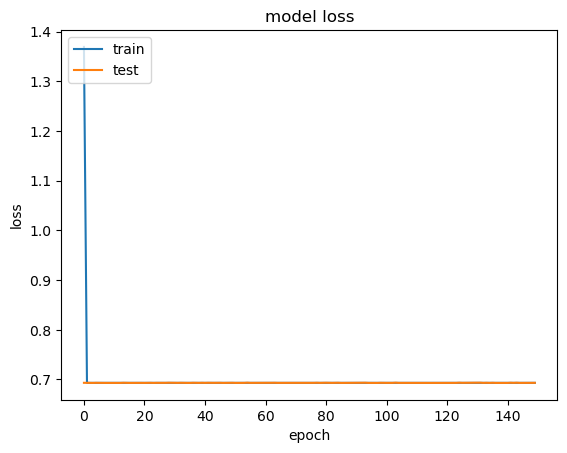

In [56]:
#summarize history for history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

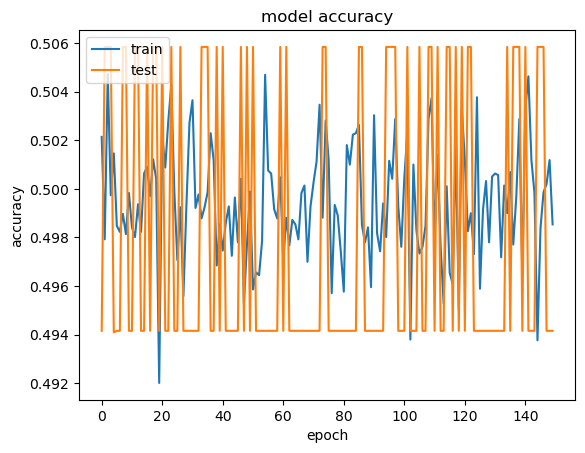

In [47]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Conclusion: Both of plots do not look perfect. However, I notice that it returns to a good position every now and then. I realize that this is not ideal data to work with, only observational, so it is normal.

# For normalized data:


Here everything works analogously, only on a normalized data set.

In [48]:
(train_set, test_set) = train_test_split(df2.values, train_size = 0.7, random_state = 13)

print('Train size:', train_set.shape[0])
print('Test size:', test_set.shape[0])

Train size: 48510
Test size: 20791


In [49]:
train_inputs = train_set[:, 0:11]
train_classes = train_set[:, 11]
test_inputs = test_set[:, 0:11]
test_classes = test_set[:, 11]

In [50]:
results2 = []

DECISION TREE - SMALLER

In [51]:
dtc3 = DecisionTreeClassifier(max_depth = 4)

dtc3.fit(train_inputs, train_classes)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'x[4] <= 0.017\ngini = 0.5\nsamples = 48510\nvalue = [24296, 24214]'),
 Text(0.25, 0.7, 'x[0] <= 0.724\ngini = 0.434\nsamples = 28661\nvalue = [19545, 9116]'),
 Text(0.125, 0.5, 'x[6] <= 2.5\ngini = 0.363\nsamples = 17743\nvalue = [13518, 4225]'),
 Text(0.0625, 0.3, 'x[0] <= 0.409\ngini = 0.346\nsamples = 16967\nvalue = [13195, 3772]'),
 Text(0.03125, 0.1, 'gini = 0.236\nsamples = 4564\nvalue = [3941, 623]'),
 Text(0.09375, 0.1, 'gini = 0.379\nsamples = 12403\nvalue = [9254, 3149]'),
 Text(0.1875, 0.3, 'x[7] <= 2.5\ngini = 0.486\nsamples = 776\nvalue = [323, 453]'),
 Text(0.15625, 0.1, 'gini = 0.377\nsamples = 330\nvalue = [83, 247]'),
 Text(0.21875, 0.1, 'gini = 0.497\nsamples = 446\nvalue = [240, 206]'),
 Text(0.375, 0.5, 'x[6] <= 2.5\ngini = 0.495\nsamples = 10918\nvalue = [6027, 4891]'),
 Text(0.3125, 0.3, 'x[0] <= 0.883\ngini = 0.487\nsamples = 9775\nvalue = [5682, 4093]'),
 Text(0.28125, 0.1, 'gini = 0.469\nsamples = 7161\nvalue = [4466, 2695]'),
 Text(0.34375, 0.

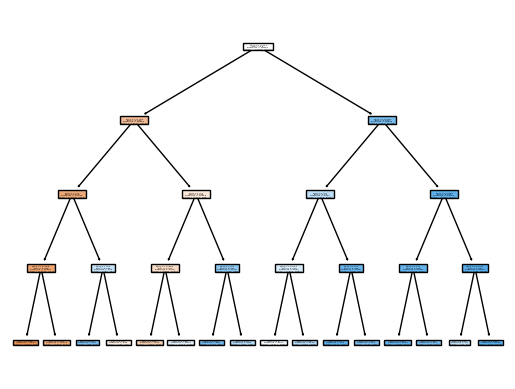

In [52]:
tree.plot_tree(dtc3, filled = True)

Confusion matrix for a smaller tree: 


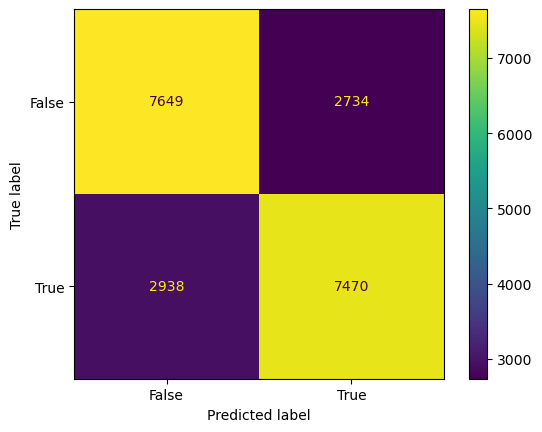

 
Accuracy for a smaller tree: 0.7271896493675148


In [53]:
print('Confusion matrix for a smaller tree: ')
tree_pred3 = dtc3.predict(test_inputs)
cm = confusion_matrix(test_classes, tree_pred3)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for a smaller tree:', dtc3.score(test_inputs, test_classes))
results2.append(dtc3.score(test_inputs, test_classes))

DECISION TREE - BIGGER

In [54]:
dtc4 = DecisionTreeClassifier()

dtc4.fit(train_inputs, train_classes)

DecisionTreeClassifier()

[Text(0.5971410297472197, 0.9903846153846154, 'x[4] <= 0.017\ngini = 0.5\nsamples = 48510\nvalue = [24296, 24214]'),
 Text(0.38674081482782124, 0.9711538461538461, 'x[0] <= 0.724\ngini = 0.434\nsamples = 28661\nvalue = [19545, 9116]'),
 Text(0.23152435337803218, 0.9519230769230769, 'x[6] <= 2.5\ngini = 0.363\nsamples = 17743\nvalue = [13518, 4225]'),
 Text(0.12233933775608273, 0.9326923076923077, 'x[0] <= 0.409\ngini = 0.346\nsamples = 16967\nvalue = [13195, 3772]'),
 Text(0.04442568907993998, 0.9134615384615384, 'x[6] <= 1.5\ngini = 0.236\nsamples = 4564\nvalue = [3941, 623]'),
 Text(0.02456831171676261, 0.8942307692307693, 'x[4] <= 0.016\ngini = 0.213\nsamples = 4107\nvalue = [3610, 497]'),
 Text(0.009354280012475052, 0.875, 'x[3] <= 0.308\ngini = 0.153\nsamples = 1746\nvalue = [1600, 146]'),
 Text(0.004951447577319481, 0.8557692307692307, 'x[5] <= 0.019\ngini = 0.122\nsamples = 1040\nvalue = [972, 68]'),
 Text(0.004847775662886472, 0.8365384615384616, 'x[7] <= 1.5\ngini = 0.121\nsam

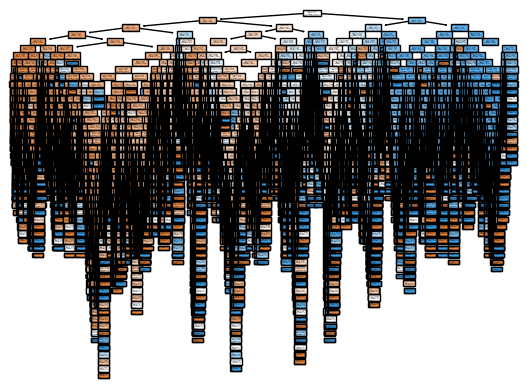

In [55]:
tree.plot_tree(dtc4, filled = True)

Confusion matrix for a bigger tree: 


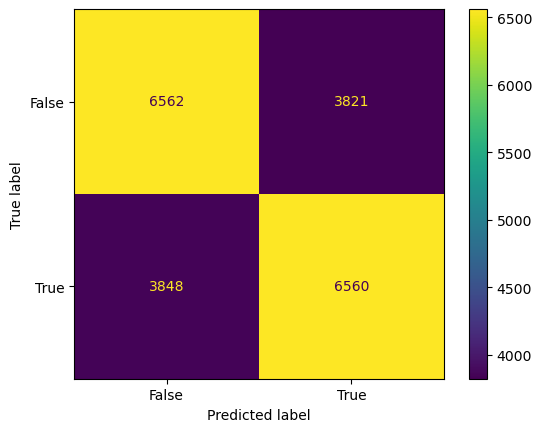

 
Accuracy for a smaller tree: 0.6311384733779039


In [61]:
print('Confusion matrix for a bigger tree: ')
tree_pred4 = dtc4.predict(test_inputs)
cm = confusion_matrix(test_classes, tree_pred4)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for a smaller tree:', dtc4.score(test_inputs, test_classes))
results2.append(dtc4.score(test_inputs, test_classes))

NAIVE BAYES

Confusion matrix for Naive Bayes: 


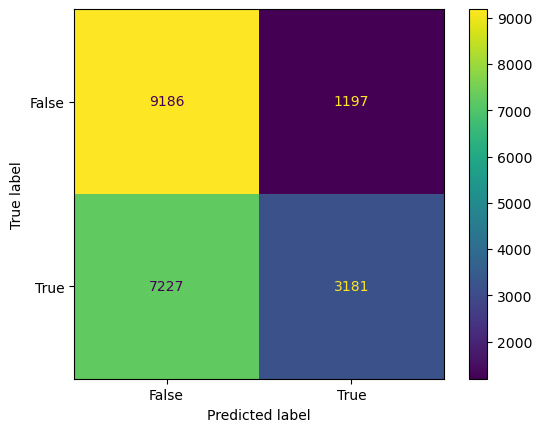

 
Accuracy for Naive Bayes:  0.5948246837573951


In [62]:
print('Confusion matrix for Naive Bayes: ')

NB2 = GaussianNB()
NB2.fit(train_inputs, train_classes)
pred_NB2 = NB2.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_NB2)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for Naive Bayes: ', metrics.accuracy_score(test_classes, pred_NB2))
results2.append(metrics.accuracy_score(test_classes, pred_NB2))

KNN3

Confusion matrix for 3 nearest neighbors: 


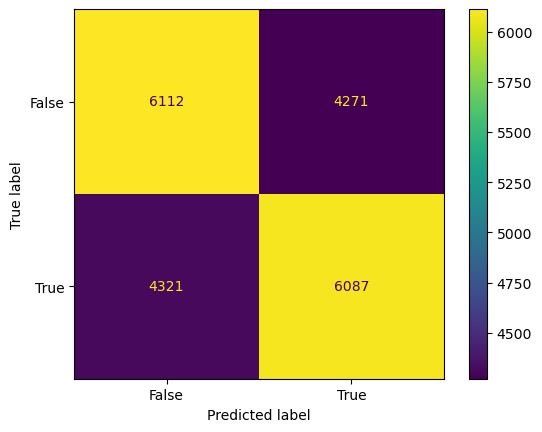

 
Accuracy for 3 nearest neighbors:  0.5867442643451494


In [63]:
print('Confusion matrix for 3 nearest neighbors: ')

knn3_2 = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn3_2.fit(train_inputs, train_classes)
pred_knn3_2 = knn3_2.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn3_2)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 3 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn3_2))
results2.append(metrics.accuracy_score(test_classes, pred_knn3_2))

KNN5

Confusion matrix for 5 nearest neighbors: 


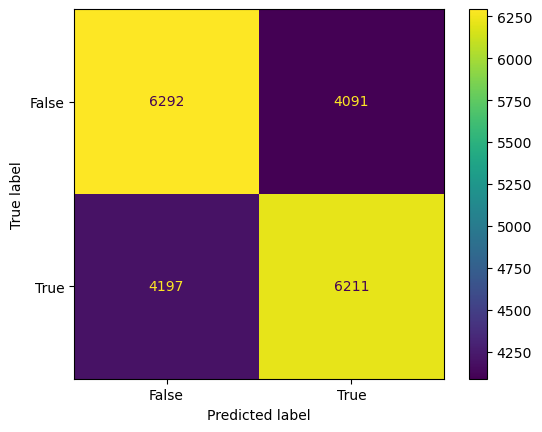

 
Accuracy for 5 nearest neighbors:  0.6013659756625463


In [64]:
print('Confusion matrix for 5 nearest neighbors: ')

knn5_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn5_2.fit(train_inputs, train_classes)
pred_knn5_2 = knn5_2.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn5_2)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 5 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn5_2))
results2.append(metrics.accuracy_score(test_classes, pred_knn5_2))

KNN9

Confusion matrix for 9 nearest neighbors: 


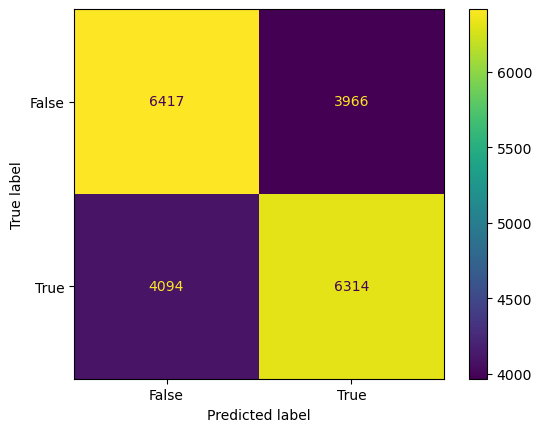

 
Accuracy for 9 nearest neighbors:  0.612332259150594


In [65]:
print('Confusion matrix for 9 nearest neighbors: ')

knn9_2 = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
knn9_2.fit(train_inputs, train_classes)
pred_knn9_2 = knn9_2.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn9_2)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 9 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn9_2))
results2.append(metrics.accuracy_score(test_classes, pred_knn9_2))

KNN11

Confusion matrix for 11 nearest neighbors: 


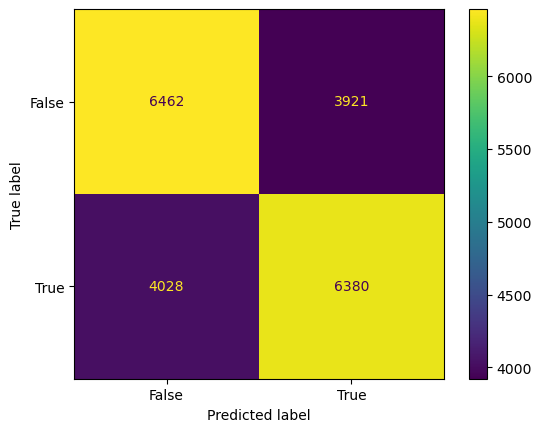

 
Accuracy for 11 nearest neighbors:  0.6176711076908278


In [66]:
print('Confusion matrix for 11 nearest neighbors: ')

knn11_2 = KNeighborsClassifier(n_neighbors = 11, metric = 'euclidean')
knn11_2.fit(train_inputs, train_classes)
pred_knn11_2 = knn11_2.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn11_2)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 11 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn11_2))
results2.append(metrics.accuracy_score(test_classes, pred_knn11_2))

KNN20

Confusion matrix for 20 nearest neighbors: 


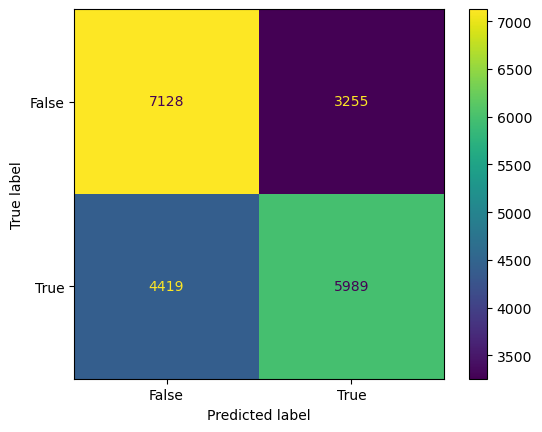

 
Accuracy for 20 nearest neighbors:  0.6308979847049204


In [67]:
print('Confusion matrix for 20 nearest neighbors: ')

knn20_2 = KNeighborsClassifier(n_neighbors = 20, metric = 'euclidean')
knn20_2.fit(train_inputs, train_classes)
pred_knn20_2 = knn20_2.predict(test_inputs)
cm = confusion_matrix(test_classes, pred_knn20_2)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for 20 nearest neighbors: ', metrics.accuracy_score(test_classes, pred_knn20_2))
results2.append(metrics.accuracy_score(test_classes, pred_knn20_2))

NEURAL NETWORKS

In [68]:
train_inputs = train_set[:, 0:11]
train_classes = train_set[:, 11]
test_inputs = test_set[:, 0:11]
test_classes = test_set[:, 11]

1 layer and 2 neurons

Confusion matrix for neural networks with 1 layer and 2 neurons: 


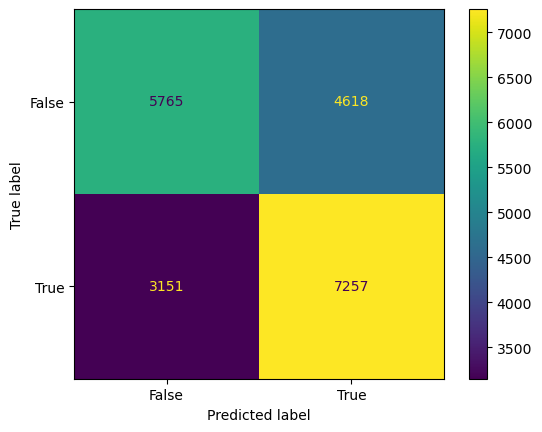

 
Accuracy for neural networks with 1 layer and 2 neurons:  0.6263286999182338


In [69]:
print('Confusion matrix for neural networks with 1 layer and 2 neurons: ')
mlp7 = MLPClassifier(hidden_layer_sizes = (2, ), max_iter = 3000)
mlp7.fit(train_inputs, train_classes)

predictions_test7 = mlp7.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test7)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 1 layer and 2 neurons: ', metrics.accuracy_score(test_classes, predictions_test7))
results2.append(metrics.accuracy_score(test_classes, predictions_test7))

2 layers and 3 neurons in each

Confusion matrix for neural networks with 2 layers and 3 neurons in each:


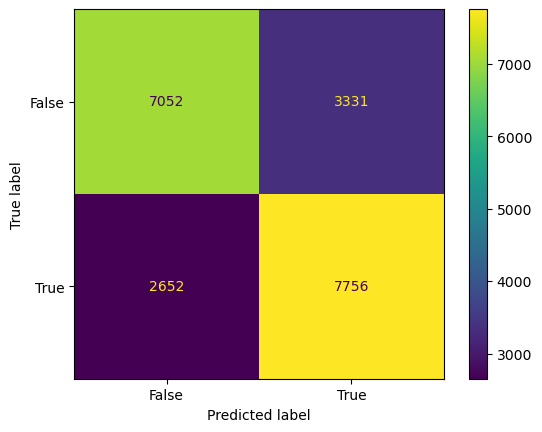

 
Accuracy for neural networks with 2 layers and 3 neurons in each:  0.712231253907941


In [70]:
print('Confusion matrix for neural networks with 2 layers and 3 neurons in each:' )
mlp8 = MLPClassifier(hidden_layer_sizes = (3, 3, ), max_iter = 3000)
mlp8.fit(train_inputs, train_classes)

predictions_test8 = mlp8.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test8)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 2 layers and 3 neurons in each: ', metrics.accuracy_score(test_classes, predictions_test8))
results2.append(metrics.accuracy_score(test_classes, predictions_test8))

8 layers and 4 neurons in each

Confusion matrix for neural networks with 8 layers and 4 neurons in each:


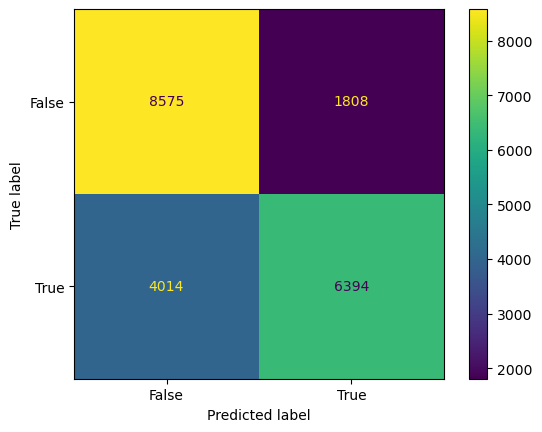

 
Accuracy for neural networks with 8 layers and 4 neurons in each:  0.7199749891780097


In [71]:
print('Confusion matrix for neural networks with 8 layers and 4 neurons in each:' )
mlp9 = MLPClassifier(hidden_layer_sizes = (4, 4, 4, 4, 4, 4, 4, 4, ), max_iter = 5000)
mlp9.fit(train_inputs, train_classes)

predictions_test9 = mlp9.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test9)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 8 layers and 4 neurons in each: ', metrics.accuracy_score(test_classes, predictions_test9))
results2.append(metrics.accuracy_score(test_classes, predictions_test9))

11 layers and 4 neurons in each

Confusion matrix for neural networks with 11 layers and 4 neurons in each:


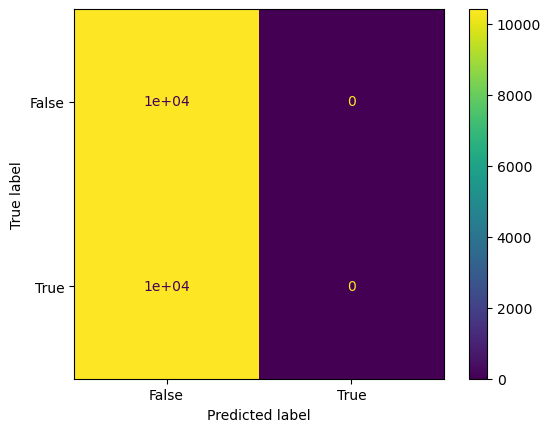

 
Accuracy for neural networks with 11 layers and 4 neurons in each:  0.49939877831754126


In [72]:
print('Confusion matrix for neural networks with 11 layers and 4 neurons in each:' )
mlp10 = MLPClassifier(hidden_layer_sizes = (4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4), max_iter = 5000)
mlp10.fit(train_inputs, train_classes)

predictions_test10 = mlp10.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test10)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 11 layers and 4 neurons in each: ', metrics.accuracy_score(test_classes, predictions_test10))
results2.append(metrics.accuracy_score(test_classes, predictions_test10))

11 layers and 10 neurons in each

Confusion matrix for neural networks with 11 layers and 10 neurons in each:


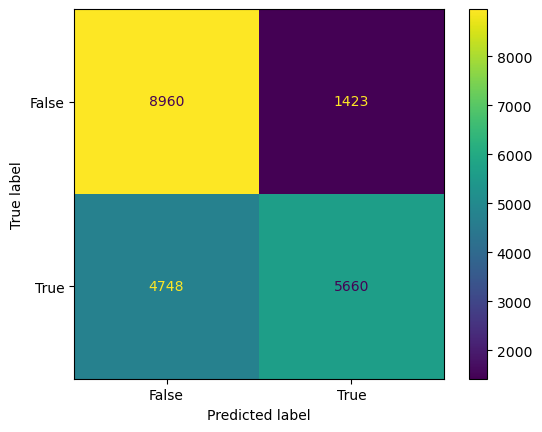

 
Accuracy for neural networks with 11 layers and 10 neurons in each:  0.7031888798037612


In [73]:
print('Confusion matrix for neural networks with 11 layers and 10 neurons in each:' )
mlp11 = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter = 5000)
mlp11.fit(train_inputs, train_classes)

predictions_test11 = mlp11.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test11)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 11 layers and 10 neurons in each: ', metrics.accuracy_score(test_classes, predictions_test11))
results2.append(metrics.accuracy_score(test_classes, predictions_test11))

11 layers and 4 neurons in each and with relu

Confusion matrix for neural networks with 11 layers and 4 neurons in each and with relu:


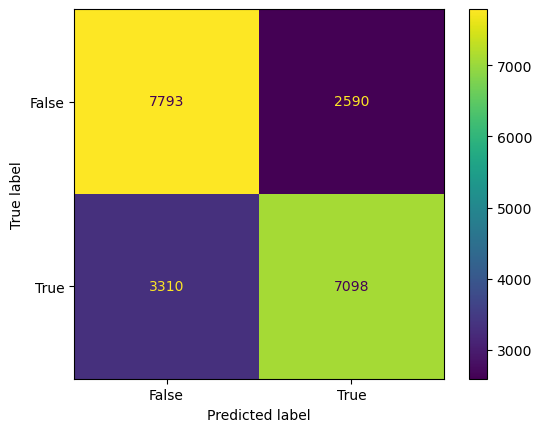

 
Accuracy for neural networks with 11 layers and 10 neurons in each and with relu:  0.7162233658794671


In [74]:
print('Confusion matrix for neural networks with 11 layers and 4 neurons in each and with relu:' )
mlp12 = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), activation = 'relu', max_iter = 5000)
mlp12.fit(train_inputs, train_classes)

predictions_test12 = mlp12.predict(test_inputs)
cm = confusion_matrix(test_classes, predictions_test12)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print(' ')
print('Accuracy for neural networks with 11 layers and 10 neurons in each and with relu: ', metrics.accuracy_score(test_classes, predictions_test12))
results2.append(metrics.accuracy_score(test_classes, predictions_test12))

model

In [75]:
df2['diagnose'] = df2['diagnose'].str.replace('healthy', '0')
df2['diagnose'] = df2['diagnose'].str.replace('sick', '1')
df2

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoking,alcohol_intake,physical_activity,diagnose
0,0.903678,1,0.512821,0.310526,0.017316,0.013550,2,2,0,0,1,0
1,0.298103,1,0.553846,0.321053,0.016079,0.012647,1,1,0,0,1,1
2,0.859698,1,0.564103,0.315789,0.016698,0.013550,1,1,0,0,1,0
3,0.290437,2,0.564103,0.394737,0.016698,0.013550,1,1,1,1,1,0
4,0.975223,1,0.512821,0.273684,0.016698,0.013550,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,0.653659,2,0.579487,0.347368,0.016698,0.013550,1,1,1,0,1,0
69297,0.913899,1,0.528205,0.610526,0.017934,0.014453,2,2,0,0,1,1
69298,0.640186,2,0.656410,0.500000,0.020408,0.014453,3,1,0,1,0,1
69299,0.900736,1,0.553846,0.326316,0.017625,0.013550,1,2,0,0,0,1


In [76]:
df2 = df2.astype(np.float32)

In [77]:
(train_set, test_set) = train_test_split(df2.values, train_size = 0.7, 
random_state = 13)

train_inputs = train_set[:, 0:11]
train_classes = train_set[:, 11]
test_inputs = test_set[:, 0:11]
test_classes = test_set[:, 11]

train_classes = np_utils.to_categorical(train_classes)

In [78]:
model = Sequential()
model.add(Dense(12, input_dim = 11, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [79]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [80]:
history = model.fit(train_inputs, train_classes, validation_split = 0.33, epochs = 150, batch_size = 10, verbose = 0)

In [81]:
class_pred = model.predict(test_inputs)
class_pred = np.argmax(class_pred, axis = 1)
print('Accuracy for a model: ', accuracy_score(test_classes, class_pred))
results2.append(accuracy_score(test_classes, class_pred))

650/650 [==============================] - 1s 977us/step
Accuracy for a model:  0.718483959405512


In [82]:
print(history.history.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


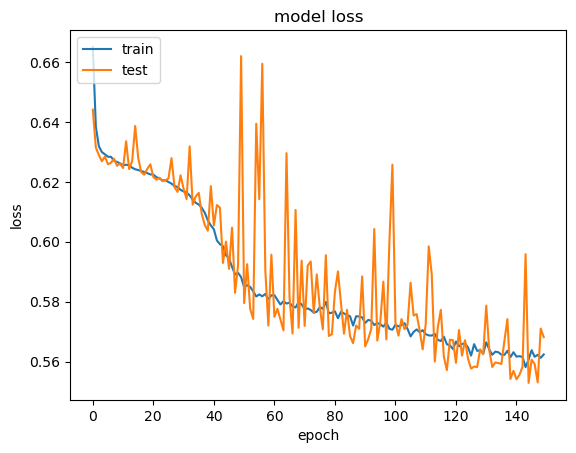

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

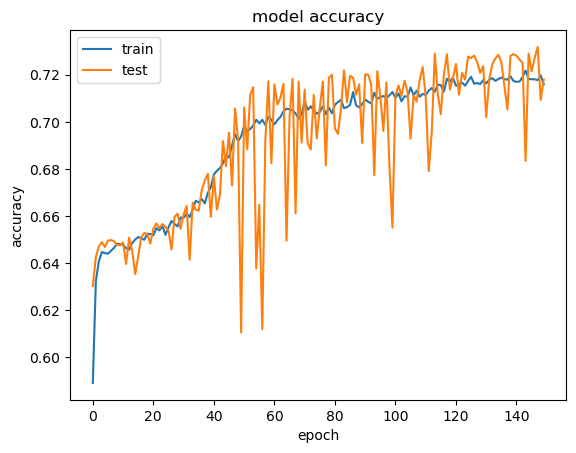

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# Presentation of the results:

In [85]:
#Initially, I need to round the results to accuracy.
for i in range(0, len(results1)):
    results1[i] = round(results1[i], 2)
    results2[i] = round(results2[i], 2)

#I'm building a table. I use lists with results for this. * is used to separate individual results.
table = [['DT1', 'DT2', 'NB', 'kNN3', 'kNN5', 'kNN9', 'kNN11', 'kNN20', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5', 'NN6', 'NN7'], 
         [*results1], [*results2]]

#first row - df1
#second row - df2

print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═══════╤═══════╤══════╤════════╤════════╤════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│   DT1 │   DT2 │   NB │   kNN3 │   kNN5 │   kNN9 │   kNN11 │   kNN20 │   NN1 │   NN2 │   NN3 │   NN4 │   NN5 │   NN6 │   NN7 │
╞═══════╪═══════╪══════╪════════╪════════╪════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│  0.73 │  0.63 │ 0.59 │   0.68 │   0.69 │   0.71 │    0.71 │    0.72 │  0.5  │  0.7  │  0.73 │  0.72 │  0.73 │  0.73 │  0.5  │
├───────┼───────┼──────┼────────┼────────┼────────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  0.73 │  0.63 │ 0.59 │   0.59 │   0.6  │   0.61 │    0.62 │    0.63 │  0.63 │  0.71 │  0.72 │  0.5  │  0.7  │  0.72 │  0.72 │
╘═══════╧═══════╧══════╧════════╧════════╧════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╛


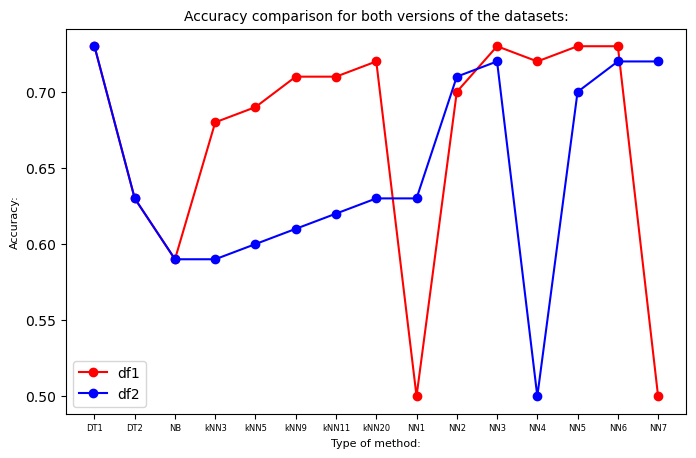

In [86]:
plt.figure(figsize = (8, 5))

types = ['DT1', 'DT2', 'NB', 'kNN3', 'kNN5', 'kNN9', 'kNN11', 'kNN20', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5', 'NN6', 'NN7']

plt.plot(types, results1, 'o-',  color = 'red', label = 'df1') #I add the results of the first version of the data to the plot.
plt.plot(types, results2, 'o-', color = 'blue', label = 'df2') #I add the results of the second version of the data to the plot.
 
#I name the axes and the graph.
plt.xlabel('Type of method:', size = 8)
plt.ylabel('Accuracy:', size = 8)
plt.title('Accuracy comparison for both versions of the datasets:', size = 10)
plt.xticks(types, size = 6)
plt.legend(loc = "best") #I add the legend.

plt.show()

Conclusion: 
    

Normalizing the data did not significantly improve the results. Usually had a negative impact on prediction. The results for the first set are mostly better.

However, normalization worked well for: 1 layer and 2 neurons (NN1), 2 layers and 3 neurons (NN2) in each and last model

The results are mostly 60% - 72%.

In my opinion the best method is: Decision Tree with only 4 branches (DT1). 
It has very good results and calculates very quickly compared to methods that took more than 10 minutes.

Good results were also obtained by: 
model for df2, 
8 layers and 4 neurons in each (NN3) for df1,
11 layers and 10 neurons in each (NN6) for df1.

And the worst: 
1 layer and 2 neurons (NN1) for df1,
last model for df1,
11 layers and 4 neurons in each (NN4) for df2